# **Predictive Value Calculation**

The goal of a project is reinforce knowledge of Probability, principally Bayes’ Theorem.  
For that reason, I opted to study Diagnostic Tests.
This project was developed to demonstrate show relevance about Bayes’ Theorem in clinical test results.
Several people believe that one test with 90% of sensitivity, result positive is the same that 90% of possibility of having the disease.  
But is false, because prevalence in population is very important factor for true positive or true negative. In sumary, sensitivity and specificity are inherent proprerties differente from prevalence which is dependes on the population


### Data Acquisition

Data used in this notebook were exctracted from the site [Covid-19 Open Data](https://health.google.com/covid-19/open-data/raw-data).  
COVID-19 was the first global pandemic of the 21st century, and the first case was officially diagnosed in Brazil on date 26/02/2020.  
Due to its high transmissibility, diagnostic tests were developed quickly.  
In this notebook, we analyze data related to COVID-19 tests made in Brazil, through one of the largest COVID-19 data aggregations.  
The dataset contains information that was uploaded daily from hundreds of sources. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path_covid = "/home/vaneza/Documents/Projetos/Calculadora_Valor_Preditivo/DB_Covid/epidemiology.csv"

#Dates of bula "Teste Rápido do Antígeno da COVID-19 (Swab)"
sensitivity = (93.3 / 100) # probability of be positive and pacient be sickness
especificity = (99.1 / 100) # probability of be negative and pacient dont be sickness

# Lists
periods = []
prevalence_list = []
VPP_list = []
VPN_list = []

df_covid = pd.read_csv(path_covid)

df_covid

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12525820,2022-09-09,ZW,11.0,0.0,NaN,NaN,256870.0,5596.0,NaN,NaN
12525821,2022-09-10,ZW,18.0,0.0,NaN,NaN,256888.0,5596.0,NaN,NaN
12525822,2022-09-11,ZW,0.0,0.0,NaN,NaN,256888.0,5596.0,NaN,NaN
12525823,2022-09-12,ZW,51.0,0.0,NaN,NaN,256939.0,5596.0,NaN,NaN


In [ ]:
#Functions

def prevalence(df, d0, dend):

    df_tested = df[
         (df["date"] >= d0) &
        (df["date"] <= dend)
    ]
    tested = df_tested["new_tested"].sum()

    df_confirmed = df[
        (df["date"] >= d0) &
        (df["date"] <= dend)
    ]
    confirmed = df_confirmed["new_confirmed"].sum()

    prevalence = confirmed/tested
    return prevalence

def VPP(sensitivity, especificity, prevalence):
    
    true_positive = sensitivity * prevalence
    false_positive = (1 - especificity) * (1 - prevalence) # Complementar Probability
    
    VPP =  true_positive / (true_positive + false_positive)
    return VPP

def VPN(sensitivity, especificity, prevalence):

    true_negative = especificity * (1 - prevalence)
    false_negative = (1 - sensitivity) * prevalence
    
    VPN =  true_negative / (true_negative + false_negative)
    return VPN

### Data Analysis 

For understanding the data

**Dictionary of variables**

date - date (YYYY-MM-DD) of the datapoint  
key	string - identifying the region  
new_confirmed1 - Count of new cases confirmed after positive test on this date  
new_deceased1	-	Count of new deaths from a positive COVID-19 case on this date  
new_recovered1	-	Count of new recoveries from a positive COVID-19 case on this date  
new_tested2	-	Count of new COVID-19 tests performed on this date  
cumulative_confirmed3	-	Cumulative sum of cases confirmed after positive test to date  
cumulative_deceased3	-	Cumulative sum of deaths from a positive COVID-19 case to date  
cumulative_recovered3	-	Cumulative sum of recoveries from a positive COVID-19 case to date  
cumulative_tested2,3	-	Cumulative sum of COVID-19 tests performed to date  

In [16]:
df_covid.columns

Index(['date', 'location_key', 'new_confirmed', 'new_deceased',
       'new_recovered', 'new_tested', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested'],
      dtype='str')

In [17]:
df_covid.info()

<class 'pandas.DataFrame'>
RangeIndex: 12525825 entries, 0 to 12525824
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date                  str    
 1   location_key          str    
 2   new_confirmed         float64
 3   new_deceased          float64
 4   new_recovered         float64
 5   new_tested            float64
 6   cumulative_confirmed  float64
 7   cumulative_deceased   float64
 8   cumulative_recovered  float64
 9   cumulative_tested     float64
dtypes: float64(8), str(2)
memory usage: 955.6 MB


In [18]:
df_covid.describe()

,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
count,1.247580e+07,1.166714e+07,3.980462e+06,3.194489e+06,1.232704e+07,1.147482e+07,3.991157e+06,3.012920e+06
mean,1.111905e+02,1.274817e+00,2.104549e+02,2.509508e+03,3.539969e+04,5.874310e+02,6.655680e+04,9.057159e+05
std,1.165983e+04,8.808127e+01,1.898989e+04,2.955847e+05,6.135014e+05,9.228857e+03,1.572899e+06,1.518347e+07
min,-5.045418e+06,-6.381100e+04,-1.001683e+07,-3.541552e+08,0.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.020000e+02,3.000000e+00,0.000000e+00,3.460000e+02
50%,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.034000e+03,1.800000e+01,7.000000e+00,1.890000e+03
75%,1.100000e+01,0.000000e+00,5.000000e+00,5.200000e+01,5.002000e+03,8.100000e+01,3.099000e+03,1.508900e+04
max,5.047094e+06,6.383000e+04,9.967355e+06,3.541856e+08,9.244050e+07,1.005195e+06,2.345841e+08,9.214000e+09


### Data Processing

In [19]:
# Filter columns
df_covid = df_covid[[
    'date', 'location_key', 'new_confirmed', 'new_deceased',
    'new_recovered', 'new_tested'
]]

df_covid = (
    df_covid.groupby("date")[
    ['new_confirmed', 'new_deceased', 'new_recovered', 'new_tested']
    ].sum()
    .reset_index()
)

df_covid["date"] = pd.to_datetime(
    df_covid["date"], errors='coerce'
).dt.strftime('%d-%m-%Y')

df_covid["date"] = pd.to_datetime(
    df_covid["date"],
    format="%d-%m-%Y"
).dt.normalize()

df_covid.info()

<class 'pandas.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           994 non-null    datetime64[us]
 1   new_confirmed  994 non-null    float64       
 2   new_deceased   994 non-null    float64       
 3   new_recovered  994 non-null    float64       
 4   new_tested     994 non-null    float64       
dtypes: datetime64[us](1), float64(4)
memory usage: 39.0 KB


In [20]:
df_covid = df_covid[
        df_covid["date"] >= "2020-02-26" #date of first case of Covid in Brazil
]

df_covid = df_covid.reset_index(drop=True) # ensure index asc

In [21]:
# Remove negatives datas
df_covid = df_covid[
        (df_covid["new_confirmed"] > 0 ) &
        (df_covid["new_tested"] > 0 )
]

df_covid.describe()

,date,new_confirmed,new_deceased,new_recovered,new_tested
count,876,8.760000e+02,876.000000,8.760000e+02,8.760000e+02
mean,2021-05-15 02:57:32.054794,1.866351e+06,17883.715753,9.461881e+05,1.013268e+07
min,2020-02-26 00:00:00,2.344000e+03,-54737.000000,-9.889407e+06,2.088600e+04
25%,2020-10-03 18:00:00,7.649742e+05,11992.500000,3.937260e+05,4.934543e+06
50%,2021-05-10 12:00:00,1.174756e+06,16553.000000,1.000186e+06,1.035228e+07
75%,2021-12-21 06:00:00,1.696920e+06,23474.500000,1.468506e+06,1.282826e+07
max,2022-09-15 00:00:00,2.458346e+07,100450.000000,1.014479e+07,3.536321e+08
std,NaN,2.835253e+06,11996.926979,1.122923e+06,1.341089e+07


Definition over periods are make manually, like this the metod of adotion of dates.

In [22]:
# Get dates of dataset
n = int(input("How many periodos do you want analyse?"))
question = int(input("1) Random dates or 2) Get dates"))

periods = []

if question == 1: #Random dates
    dates_random = df_covid["date"].sample(2*n).tolist()
    
    for i in range(0, len(dates_random), 2): # put the smaller first 
        d0, d1 = sorted([dates_random[i], dates_random[i+1]])
        periods.append((d0, d1))

else: # Get dates
    for i in range(n):
        d0 = input(f"Qual a {i+1} data inicial?")
        d1 = input(f"Qual a {i+1} data final?")

        periods.append((d0, d1))


In [23]:
# Apply functions
prevalence_list = []
VPP_list = []
VPN_list = []

for i in periods:
    prevalence_result = prevalence(df_covid, i[0], i[1])
    prevalence_list.append(prevalence_result * 100)

    VPP_result = VPP(sensitivity, especificity, prevalence_result)
    VPP_list.append(VPP_result * 100)

    VPN_result = VPN(sensitivity, especificity, prevalence_result)
    VPN_list.append(VPN_result * 100)

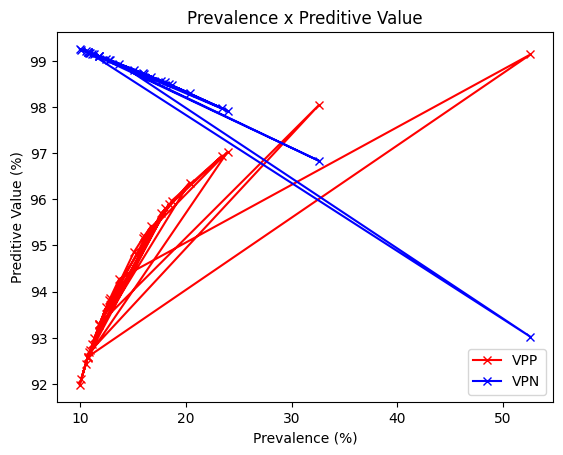

In [24]:
fig, ax = plt.subplots() 
ax.plot(prevalence_list, VPP_list, color = "red", marker = "x", label = "VPP")
ax.plot(prevalence_list, VPN_list, color = "blue", marker = "x", label = "VPN")
ax.set_title('Prevalence x Preditive Value')
ax.set_xlabel('Prevalence (%)')
ax.set_ylabel('Preditive Value (%)')
ax.legend()
plt.show()

Some lines are overlapping because Prevalence is not continuous. We need to organize ascending for better visualization.


In [25]:
df_finally = pd.DataFrame({
    "date": periods,
    "prevalence": prevalence_list,
    "VPP": VPP_list,
    "VPN": VPN_list
})

df_finally = df_finally.sort_values("prevalence")


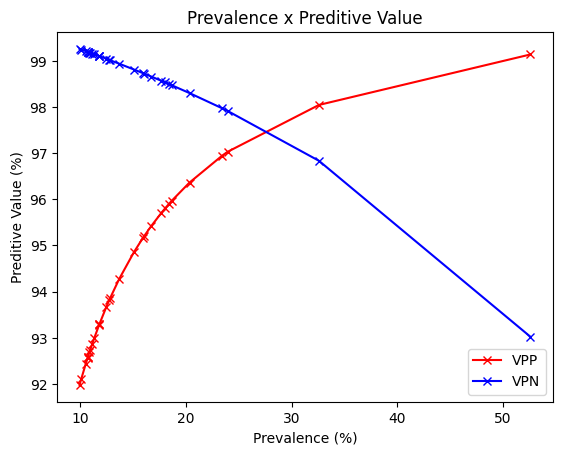

In [26]:
fig, ax = plt.subplots() 
ax.plot(df_finally["prevalence"], df_finally["VPP"], color = "red", marker = "x", label = "VPP")
ax.plot(df_finally["prevalence"], df_finally["VPN"], color = "blue", marker = "x", label = "VPN")
ax.set_title('Prevalence x Preditive Value')
ax.set_xlabel('Prevalence (%)')
ax.set_ylabel('Preditive Value (%)')
ax.legend()
plt.show()

### Conclusion

After a superficial analysis, it is possible to conclude that, according to the theorem, fewer people are sick result in more false positive tests and fewer true positives.  
Conversely, when more people are sick false negatives decrease and true positives increase.  

Furthermore, it is important to remember that this analysis was made using data from an open repository.